**Project Final Report**

**Authors: Student Number**

Mansehaj Randhawa: 23016405

Kiana Shahbazi:

Paniz Arbabi:

In [3]:
library(readr)
library(dplyr)
library(tidyverse)
library(tidymodels)

options(repr.matrix.max.rows = 6)

player_url   <- "https://raw.githubusercontent.com/mansehajrandhawa/Data-Science-Project/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/mansehajrandhawa/Data-Science-Project/refs/heads/main/sessions.csv"

players  <- read_csv(player_url)
sessions <- read_csv(sessions_url)

head(players)
head(sessions)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────────────────────────────────────────────── tidymodels 1.4.1 ──

✔ broom        1.0.11     ✔ rsample      1.3.1 
✔ dials        1.4.2      ✔ tailor       0.1.0 
✔ infer        1.

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [4]:
players_wrangled  <- players
sessions_wrangled <- sessions

sessions_wrangled <- sessions_wrangled |>
  mutate(
    # parse start and end times as POSIXct
    start_time_posix = as.POSIXct(start_time,
                                  format = "%d/%m/%Y %H:%M",
                                  tz = "UTC"),
    end_time_posix   = as.POSIXct(end_time,
                                  format = "%d/%m/%Y %H:%M",
                                  tz = "UTC"),
    # fields we actually want for the forecasting question
    date    = as.Date(start_time_posix),
    hour    = as.numeric(format(start_time_posix, "%H")),
    weekday = weekdays(date)
  )

sessions_wrangled |>
  select(hashedEmail, start_time_posix, end_time_posix,
         date, hour, weekday) |>
  head()

hashedEmail,start_time_posix,end_time_posix,date,hour,weekday
<chr>,<dttm>,<dttm>,<date>,<dbl>,<chr>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,2024-06-30,18,Sunday
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,2024-06-17,23,Monday
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,2024-07-25,17,Thursday
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00,2024-07-25,3,Thursday
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,2024-05-25 16:12:00,2024-05-25,16,Saturday
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00,2024-06-23,15,Sunday


In [5]:
hourly_players <- sessions_wrangled |>
  group_by(date, hour, weekday) |>
  summarise(
    unique_players = n_distinct(hashedEmail),
    .groups = "drop"
  )

head(hourly_players)

date,hour,weekday,unique_players
<date>,<dbl>,<chr>,<int>
2024-04-06,9,Saturday,1
2024-04-06,20,Saturday,1
2024-04-06,22,Saturday,1
2024-04-07,0,Sunday,1
2024-04-07,2,Sunday,1
2024-04-07,5,Sunday,2


In [6]:
hourly_summary <- hourly_players |>
  summarise(
    min_players    = min(unique_players,    na.rm = TRUE),
    mean_players   = mean(unique_players,   na.rm = TRUE),
    median_players = median(unique_players, na.rm = TRUE),
    max_players    = max(unique_players,    na.rm = TRUE)
  )

hourly_summary

min_players,mean_players,median_players,max_players
<int>,<dbl>,<dbl>,<int>
1,1.451477,1,6


hour,mean_players
<dbl>,<dbl>
0,1.600000
1,1.288136
2,1.737500
⋮,⋮
21,1.446429
22,1.351852
23,1.453333


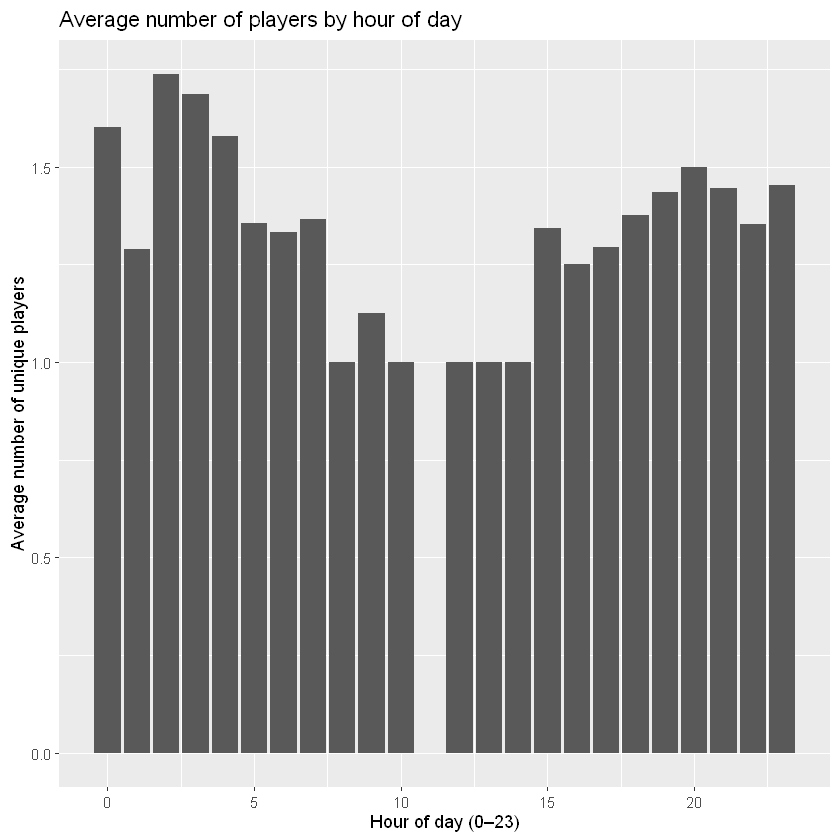

In [7]:
players_by_hour <- hourly_players |>
  group_by(hour) |>
  summarise(
    mean_players = mean(unique_players, na.rm = TRUE),
    .groups = "drop"
  )

players_by_hour

ggplot(players_by_hour,
       aes(x = hour,
           y = mean_players)) +
  geom_col() +
  labs(
    title = "Average number of players by hour of day",
    x = "Hour of day (0–23)",
    y = "Average number of unique players"
  )

weekday,mean_players
<chr>,<dbl>
Friday,1.495575
Monday,1.416667
Saturday,1.463855
⋮,⋮
Thursday,1.435484
Tuesday,1.412214
Wednesday,1.411765


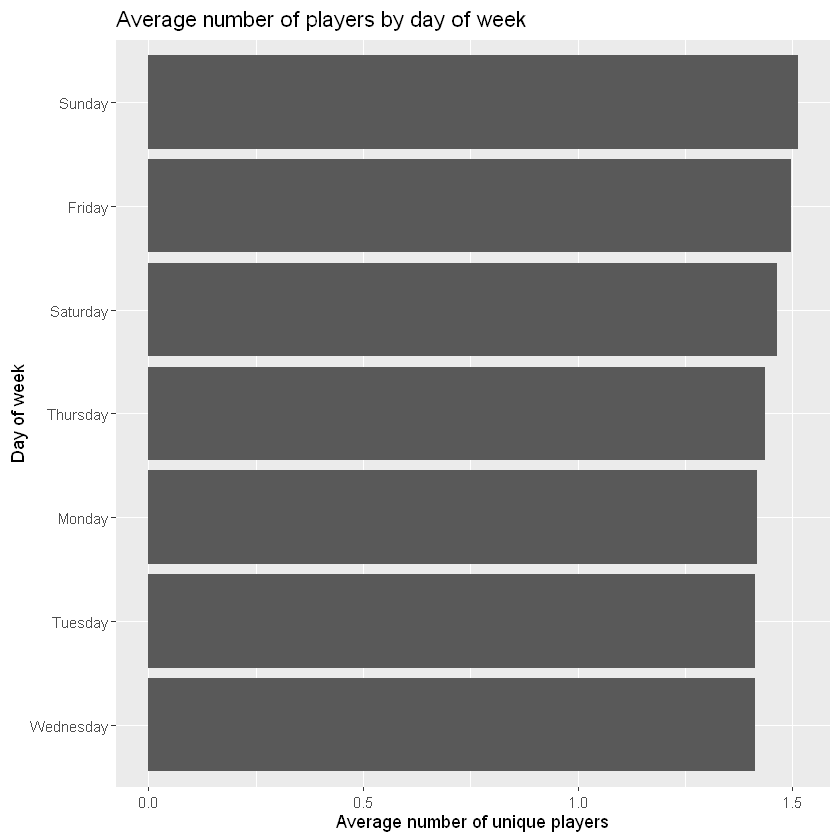

In [8]:
players_by_weekday <- hourly_players |>
  group_by(weekday) |>
  summarise(
    mean_players = mean(unique_players, na.rm = TRUE),
    .groups = "drop"
  )

players_by_weekday

ggplot(players_by_weekday,
       aes(x = reorder(weekday, mean_players),
           y = mean_players)) +
  geom_col() +
  coord_flip() +
  labs(
    title = "Average number of players by day of week",
    x = "Day of week",
    y = "Average number of unique players"
  )

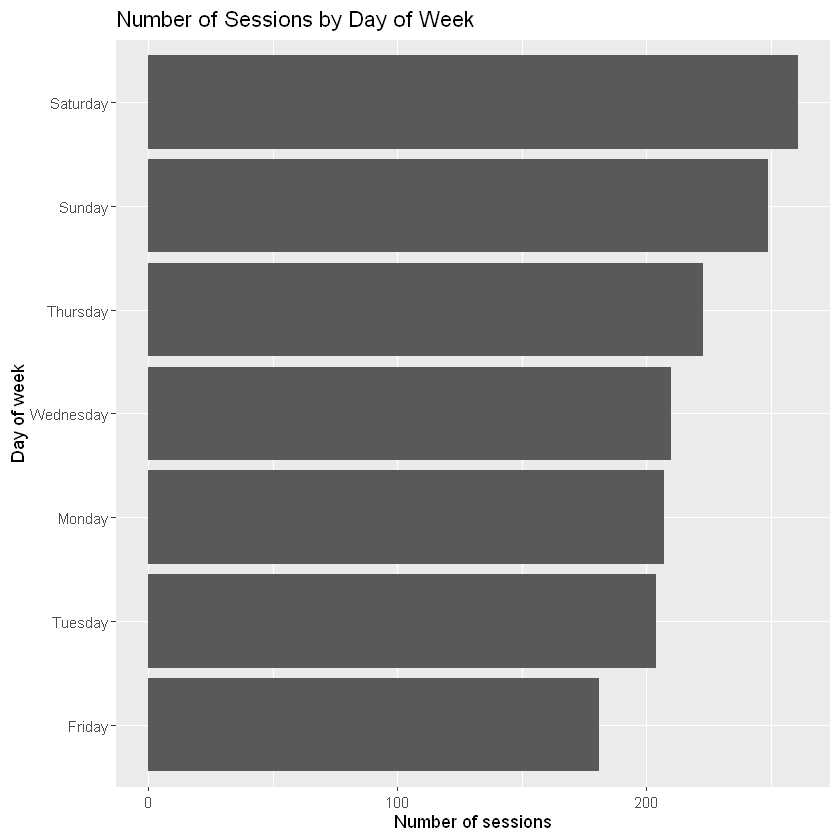

In [9]:
sessions_by_weekday <- sessions_wrangled |>
  group_by(weekday) |>
  summarise(number_of_sessions = n())

ggplot(sessions_by_weekday,
       aes(x = reorder(weekday, number_of_sessions),
           y = number_of_sessions)) +
  geom_col() +
  coord_flip() +
  labs(
    title = "Number of Sessions by Day of Week",
    x = "Day of week",
    y = "Number of sessions"
  )


In [10]:
# Data for high vs low load

hourly_model <- hourly_players |>
  mutate(
    is_weekend = if_else(weekday %in% c("Saturday", "Sunday"), 1, 0),
    high_load  = if_else(unique_players >= 2, "high", "low"),
    high_load  = factor(high_load)
  ) |>
  select(high_load, hour, is_weekend)

head(hourly_model)

high_load,hour,is_weekend
<fct>,<dbl>,<dbl>
low,9,1
low,20,1
low,22,1
low,0,1
low,2,1
high,5,1


In [11]:
# Set the seed. Don't remove this!
set.seed(9999)

# Define "high load" as the top 25% of hours by unique_players
threshold <- quantile(hourly_players$unique_players,
                      probs = 0.75,
                      na.rm = TRUE)

threshold

hourly_model <- hourly_players |>
  mutate(
    is_weekend = if_else(weekday %in% c("Saturday", "Sunday"), 1, 0),
    high_load  = if_else(unique_players >= threshold, "high", "low"),
    high_load  = as.factor(high_load)
  ) |>
  select(high_load, hour, is_weekend, weekday)

head(hourly_model)


75% 
  2

high_load,hour,is_weekend,weekday
<fct>,<dbl>,<dbl>,<chr>
low,9,1,Saturday
low,20,1,Saturday
low,22,1,Saturday
low,0,1,Sunday
low,2,1,Sunday
high,5,1,Sunday


In [12]:
load_recipe <- recipe(high_load ~ ., data = hourly_model) |>
  update_role(high_load, new_role = "outcome") |>
  step_center(all_predictors()) |>
  step_scale(all_predictors())

load_recipe



── Recipe ──────────────────────────────────────────────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 3



── Operations 

• Centering for: all_predictors()

• Scaling for: all_predictors()



In [13]:
n_rows     <- nrow(hourly_model)
train_size <- floor(0.8 * n_rows)

train_indices <- sample(1:n_rows, size = train_size)

train_data <- hourly_model[train_indices, ]
test_data  <- hourly_model[-train_indices, ]

nrow(train_data)
nrow(test_data)

[1] 758

[1] 190

In [19]:
# Scale predictors using training set mean and standard deviation

hour_mean_train <- mean(train_data$hour,       na.rm = TRUE)
hour_sd_train   <- sd(train_data$hour,         na.rm = TRUE)

week_mean_train <- mean(train_data$is_weekend, na.rm = TRUE)
week_sd_train   <- sd(train_data$is_weekend,   na.rm = TRUE)

train_X <- train_data |>
  mutate(
    hour_scaled    = (hour       - hour_mean_train) / hour_sd_train,
    weekend_scaled = (is_weekend - week_mean_train) / week_sd_train
  ) |>
  select(hour_scaled, weekend_scaled)

test_X <- test_data |>
  mutate(
    hour_scaled    = (hour       - hour_mean_train) / hour_sd_train,
    weekend_scaled = (is_weekend - week_mean_train) / week_sd_train
  ) |>
  select(hour_scaled, weekend_scaled)

train_y <- train_data$high_load
test_y  <- test_data$high_load

head(train_X)
head(test_X)


hour_scaled,weekend_scaled
<dbl>,<dbl>
0.8783949,1.3952937
1.2332484,-0.7157495
0.9966794,1.3952937
-0.7775878,-0.7157495
1.2332484,-0.7157495
-0.5410189,-0.7157495


hour_scaled,weekend_scaled
<dbl>,<dbl>
-1.2507258,-0.7157495
-1.1324413,-0.7157495
1.3515329,1.3952937
-0.6593034,-0.7157495
-0.8958723,-0.7157495
0.8783949,-0.7157495


In [20]:
knn_pred <- class::knn(
  train = as.matrix(train_X),
  test  = as.matrix(test_X),
  cl    = train_y,
  k     = 7
)

knn_accuracy <- mean(knn_pred == test_y)
knn_accuracy

table(predicted = knn_pred, actual = test_y)


[1] 0.6315789

         actual
predicted high low
     high    5   9
     low    61 115

In [21]:
test_results <- test_data |>
  mutate(
    predicted_high = knn_pred
  )

head(test_results)


high_load,hour,is_weekend,weekday,predicted_high
<fct>,<dbl>,<dbl>,<chr>,<fct>
low,0,0,Monday,high
low,1,0,Monday,low
low,22,1,Sunday,low
high,5,0,Tuesday,low
low,3,0,Thursday,low
low,18,0,Thursday,low


hour,prop_pred_high
<dbl>,<dbl>
0,0.8461538
1,0.0000000
2,0.0000000
⋮,⋮
21,0
22,0
23,0


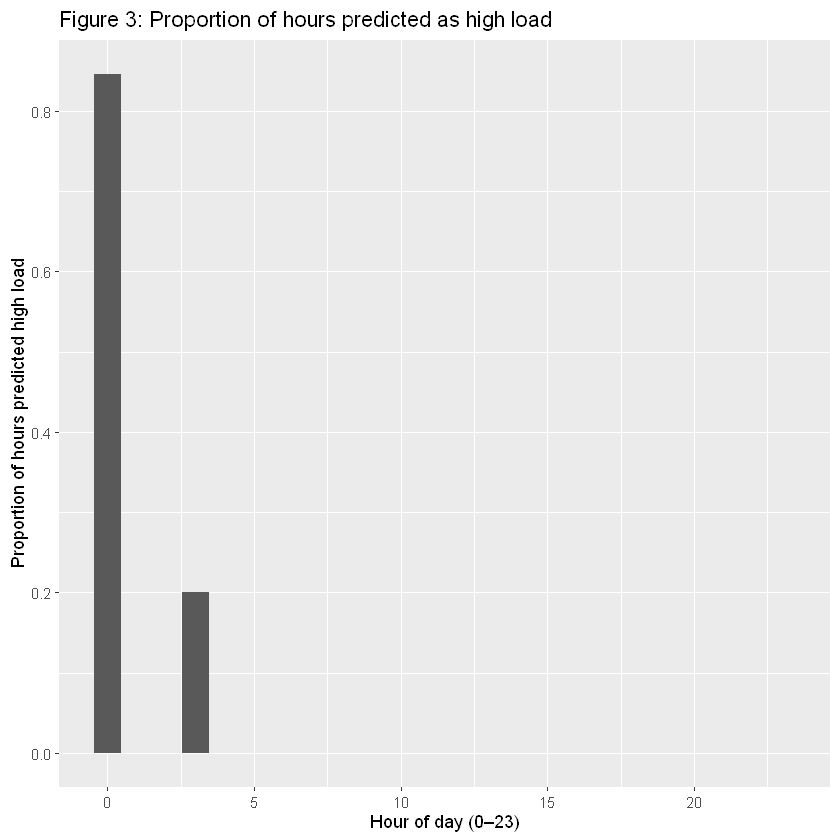

In [22]:
pred_by_hour <- test_results |>
  group_by(hour) |>
  summarise(
    prop_pred_high = mean(predicted_high == "high", na.rm = TRUE),
    .groups = "drop"
  )

pred_by_hour

ggplot(pred_by_hour,
       aes(x = hour,
           y = prop_pred_high)) +
  geom_col() +
  labs(
    title = "Figure 3: Proportion of hours predicted as high load",
    x = "Hour of day (0–23)",
    y = "Proportion of hours predicted high load"
  )


weekday,prop_pred_high
<chr>,<dbl>
Friday,0.04347826
Monday,0.11764706
Saturday,0.04878049
⋮,⋮
Thursday,0.12500000
Tuesday,0.05000000
Wednesday,0.09090909


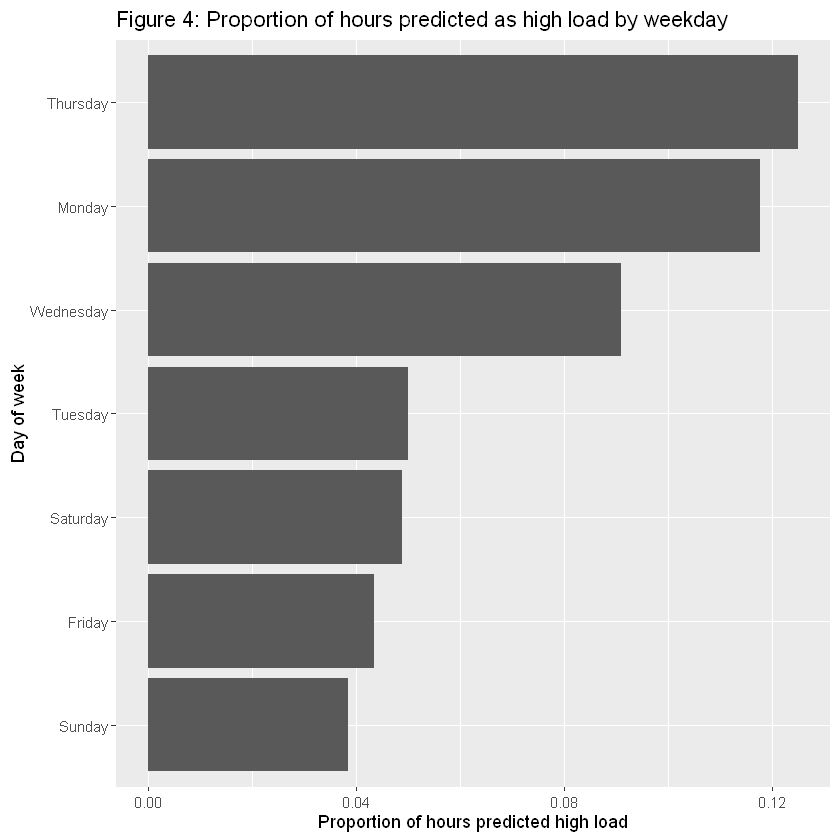

In [23]:
pred_by_weekday <- test_results |>
  group_by(weekday) |>
  summarise(
    prop_pred_high = mean(predicted_high == "high", na.rm = TRUE),
    .groups = "drop"
  )

pred_by_weekday

ggplot(pred_by_weekday,
       aes(x = reorder(weekday, prop_pred_high),
           y = prop_pred_high)) +
  geom_col() +
  coord_flip() +
  labs(
    title = "Figure 4: Proportion of hours predicted as high load by weekday",
    x = "Day of week",
    y = "Proportion of hours predicted high load"
  )


**References (Bibliography)**

Jones, Megan A. , et al. “Time Series 02: Dealing with Dates & Times in R - As.Date, POSIXct, POSIXlt | NSF NEON | Open Data to Understand Our Ecosystems.” Www.neonscience.org, 13 May 2021, www.neonscience.org/resources/learning-hub/tutorials/dc-convert-date-time-posix-r.

Abid Ali Awan. “K-Nearest Neighbors (KNN) Classification with R Tutorial.” Datacamp.com, DataCamp, 14 June 2023, www.datacamp.com/tutorial/k-nearest-neighbors-knn-classification-with-r-tutorial.